In [6]:
from pyrosm import get_data
from pyrosm.data import sources
from pyrosm import OSM

Check if Sheffield is available

In [7]:
# Check cities in great_britain
print("Cities:", sources.cities.available)

Cities: ['Aachen', 'Aarhus', 'Adelaide', 'Albuquerque', 'Alexandria', 'Amsterdam', 'Antwerpen', 'Arnhem', 'Auckland', 'Augsburg', 'Austin', 'Baghdad', 'Baku', 'Balaton', 'Bamberg', 'Bangkok', 'Barcelona', 'Basel', 'Beijing', 'Beirut', 'Berkeley', 'Berlin', 'Bern', 'Bielefeld', 'Birmingham', 'Bochum', 'Bogota', 'Bombay', 'Bonn', 'Bordeaux', 'Boulder', 'BrandenburgHavel', 'Braunschweig', 'Bremen', 'Bremerhaven', 'Brisbane', 'Bristol', 'Brno', 'Bruegge', 'Bruessel', 'Budapest', 'BuenosAires', 'Cairo', 'Calgary', 'Cambridge', 'CambridgeMa', 'Canberra', 'CapeTown', 'Chemnitz', 'Chicago', 'ClermontFerrand', 'Colmar', 'Copenhagen', 'Cork', 'Corsica', 'Corvallis', 'Cottbus', 'Cracow', 'CraterLake', 'Curitiba', 'Cusco', 'Dallas', 'Darmstadt', 'Davis', 'DenHaag', 'Denver', 'Dessau', 'Dortmund', 'Dresden', 'Dublin', 'Duesseldorf', 'Duisburg', 'Edinburgh', 'Eindhoven', 'Emden', 'Erfurt', 'Erlangen', 'Eugene', 'Flensburg', 'FortCollins', 'Frankfurt', 'FrankfurtOder', 'Freiburg', 'Gdansk', 'Genf', '

It is, let's download it

In [8]:
fp = get_data("Sheffield", directory="data")
print(fp)

c:\Users\tbalb\Documents\DataScience\pyrosm_hackathon\data\Sheffield.osm.pbf


Read in some points of interest

In [16]:
osm = OSM(fp)

pois_bus_stops = osm.get_pois(custom_filter={"highway":["bus_stop"]})
print(pois_bus_stops.shape)

pois_bus_stops.head()

(4452, 13)


c:\Users\tbalb\anaconda3\envs\pyrosm_hackathon\lib\site-packages\pyrosm\pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(


,lat,lon,tags,changeset,version,timestamp,id,highway,lit,name,ref,geometry,osm_type
0,53.363384,-1.504964,"{""bus"":""yes"",""public_transport"":""stop_position""}",0.0,0,0,27145840,bus_stop,None,Psalter Lane/Brincliffe Gardens,None,POINT (-1.50496 53.36338),node
1,53.374805,-1.473974,"{""bus"":""yes"",""public_transport"":""platform""}",0.0,0,0,70870109,bus_stop,None,The Moor / Moorfoot MF7,37023122,POINT (-1.47397 53.37481),node
2,53.377689,-1.471355,"{""bus"":""yes"",""public_transport"":""platform""}",0.0,0,0,70880471,bus_stop,None,Furnival Gate/Moorhead MH2,37023139,POINT (-1.47136 53.37769),node
3,53.377510,-1.473859,"{""bus"":""yes"",""public_transport"":""platform""}",0.0,0,0,70897011,bus_stop,None,Furnival Gate/Moorhead MH5,370023132,POINT (-1.47386 53.37751),node
4,53.436623,-1.539804,"{""bus"":""yes"",""public_transport"":""platform"",""so...",0.0,0,0,243892927,bus_stop,None,None,None,POINT (-1.53980 53.43662),node


Let's plot those and hope for the best

<AxesSubplot: >

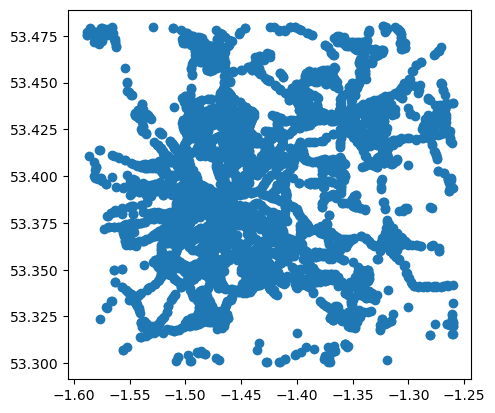

In [17]:
pois_bus_stops.plot()

Let's look at whether the bus transit network would be better than individual stops.

In [53]:
# Exclude nodes (not keeping stops, etc.)
routes = ["bus", "tram"]
rails = ["tramway", "light_rail", "tram"]
bus = ['yes']
transit = osm.get_data_by_custom_criteria(custom_filter={
                                        'route': routes,
                                        'railway': rails,
                                        'bus': bus,
                                        'public_transport': True},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=False, 
                                        keep_ways=True, 
                                        keep_relations=True)


transit.head()

c:\Users\tbalb\anaconda3\envs\pyrosm_hackathon\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


,bicycle,bus,foot,railway,tracks,tram,name,ref,public_transport,id,...,geometry,from,network,route,to,type,opening_hours,operator,website,changeset
0,None,None,None,tram,1,None,None,None,None,9355661,...,"MULTILINESTRING ((-1.46021 53.38297, -1.46025 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,yes,None,None,None,None,Meadowhall Bus Station,None,station,42029167,...,"POLYGON ((-1.41284 53.41660, -1.41283 53.41659...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,yes,yes,yes,None,None,None,None,None,None,42030893,...,"MULTILINESTRING ((-1.46330 53.37964, -1.46336 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,None,tram,1,None,None,None,None,88513205,...,"MULTILINESTRING ((-1.41223 53.41780, -1.41226 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,None,tram,1,None,None,None,None,93168212,...,"MULTILINESTRING ((-1.44422 53.38526, -1.44401 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

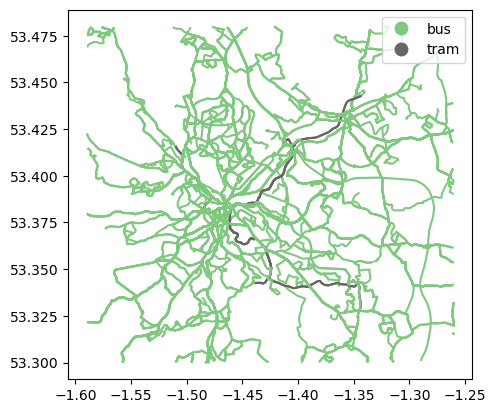

In [62]:
transit['route'].unique()
transit = transit.dropna(subset='route')
transit['route'].unique()

transit.plot(column='route',cmap='Accent',legend=True)

c:\Users\tbalb\anaconda3\envs\pyrosm_hackathon\lib\site-packages\pyrosm\pyrosm.py:323: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_landuse_data(
c:\Users\tbalb\anaconda3\envs\pyrosm_hackathon\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


<AxesSubplot: >

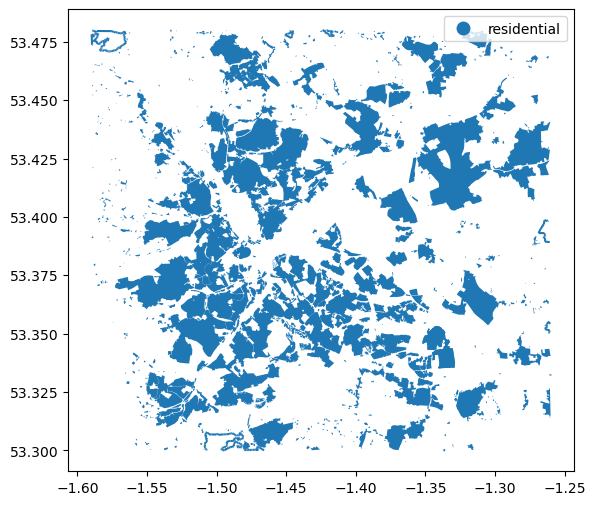

In [22]:
landuse = osm.get_landuse(custom_filter={'landuse':['residential']})

landuse.head()

landuse.plot(column='landuse', legend=True, figsize=(10,6))

<AxesSubplot: >

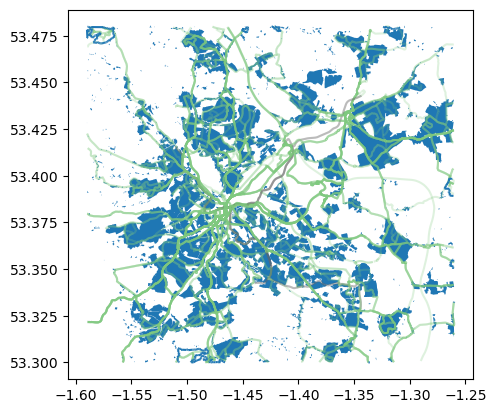

In [72]:
#Plot public transport network and residential landuse together
ax = transit.plot(column='route', cmap='Accent',alpha=.25)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
landuse.plot(ax=ax,column='landuse', figsize=(15,10))  # passing the first plot as an axis to the second
#transit.plot(ax=ax, column='route', cmap='Accent', linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

Let's look at buffering some routes by reasonable walking distance

In [ ]:
transit["buffered"] = transit.buffer(10)